## Car sale dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()
cars = pd.read_csv('Udemy course/Real-life example.csv')

In [2]:
# First,check out the dataset
cars.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [3]:
"""
From the above dataset:
1. Price and EngineV contains null, so we will have to check the number of nulls and treat them
2. Registration column has 3947 columns saying yes out of a total of 4345, so the column might not really be useful
3. Model column has about 312 unique entries which will be hard to encode (dummy var)
4. The price obviously has some outliers in the upper percentile as diff btw the 75percentile and max is about 278,300
5. The mileage also has some outliers in the upper percentile as the diff btw the 75percentile and max is about 750
6. The engineV column has the same problem.
7. The year column has the same problem on the low end or lower quantile
"""
# Before solving the problems,lets check to see if the variable types is correct
cars.dtypes
# Everything seems to be in order

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [4]:
"""
Solving problem 1 (Null Values)
1. Check the total number of null values.If its less than 5% of the dataset, we drop them"""
cars.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
"""
Null Value in Price = 172,
Null Value in EngineV = 150
Total = 322 which is less than 5% of the total dataset"""
data1 = cars.dropna(axis = 0)

In [6]:
data1.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
"""
Solving problem 2(Registration column):
We can either remove the column or dummy wach response as a dummy variable which will take time"""

'\nSolving problem 2(Registration column):\nWe can either remove the column or dummy wach response as a dummy variable which will take time'

In [8]:
"""
Solvng problem 3(Model column):
We can either remove the column or dummy wach response as a dummy variable which will take time"""
"""modelList = cars.Model.unique()
carDict = {}
for i in range(312):
    carDict[modelList[i]]= i
data1['Model']= data1['Model'].map(carDict)"""

"modelList = cars.Model.unique()\ncarDict = {}\nfor i in range(312):\n    carDict[modelList[i]]= i\ndata1['Model']= data1['Model'].map(carDict)"

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


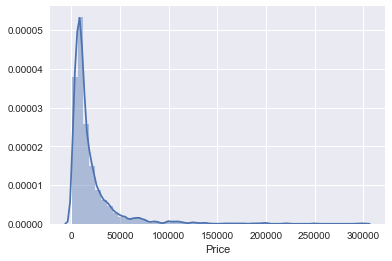

In [9]:
"""
Solving problem 4 (price outliers):
Check the distribution plot to confirm
Remove the outliers"""
sns.distplot(data1['Price'])

In [10]:
# store the upper 98th percentile in a variable and remove any column greater than that
upperQ = data1['Price'].quantile(0.99)
data2 = data1[data1.Price < upperQ]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


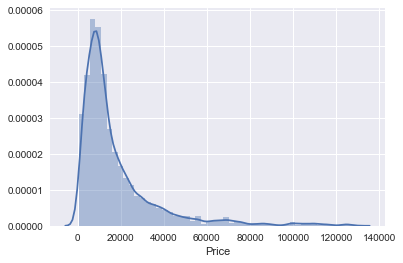

In [11]:
sns.distplot(data2.Price)

In [12]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


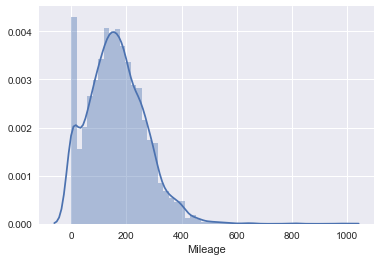

In [13]:
"""
Solve problem 5(mileage):
"""
sns.distplot(data2.Mileage)

In [14]:
upperQ2 = data2.Mileage.quantile(0.99)

In [15]:
data3 = data2[data2.Mileage < upperQ2]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


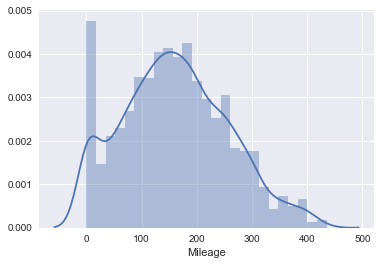

In [16]:
sns.distplot(data3.Mileage)

In [17]:
"""
Solving problem6 (EngineV):
Car engine volume is usually below 6.5"""
data4 = data3[data3.EngineV < 6.5]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


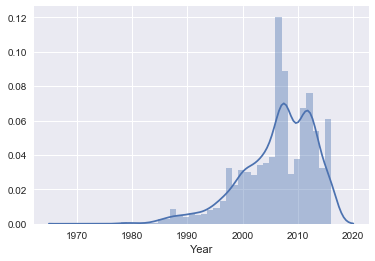

In [18]:
sns.distplot(data4.Year)

In [19]:
lowQ = data4.Year.quantile(0.01)

In [20]:
data5 = data4[data4.Year>lowQ]

In [21]:
data5.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [22]:
# Calculate the number and percentage of data lost
print(len(cars)- len(data5))
print((len(cars)- len(data5))/len(data5))

478
0.12361003361779158


In [23]:
# Lets store our clean data intoa new var and reset the index
cleanData = data5.reset_index(drop=True)

In [24]:
cleanData

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19


In [25]:
"""
Next, we want to check our data against the assumptions of Linear regression and see if its true/ok to use the model

1. Linearity
2. No endogeneity
3. No multicollinearity
4. Normality and Homoscedasticity
5. No autocorrelation
"""


'\nNext, we want to check our data against the assumptions of Linear regression and see if its true/ok to use the model\n\n1. Linearity\n2. No endogeneity\n3. No multicollinearity\n4. Normality and Homoscedasticity\n5. No autocorrelation\n'

In [26]:
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


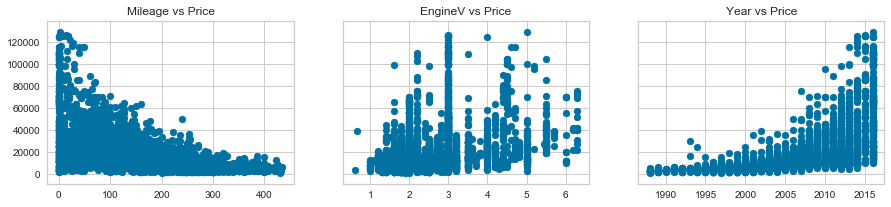

In [27]:
"""Linearity:
This will be done only to numeric data"""
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(cleanData['Mileage'], cleanData['Price'])
ax1.set_title('Mileage vs Price')
ax2.scatter(cleanData['EngineV'], cleanData['Price'])
ax2.set_title('EngineV vs Price')
ax3.scatter(cleanData['Year'], cleanData['Price'])
ax3.set_title('Year vs Price')

plt.show()

In [28]:
"""
Lets transform our price data into log"""
logPrice = np.log(cleanData.Price)
cleanData['logPrice'] = logPrice

In [29]:
cleanData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


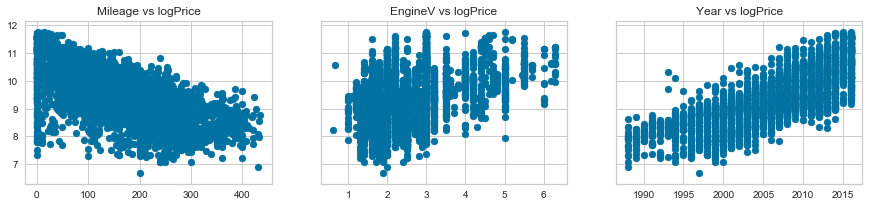

In [30]:
'Lets verify its been appropriately taken care of'
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(cleanData['Mileage'], cleanData['logPrice'])
ax1.set_title('Mileage vs logPrice')
ax2.scatter(cleanData['EngineV'], cleanData['logPrice'])
ax2.set_title('EngineV vs logPrice')
ax3.scatter(cleanData['Year'], cleanData['logPrice'])
ax3.set_title('Year vs logPrice')

plt.show()

In [31]:
# Lets drop the Price variable then
cleanData = cleanData.drop('Price',axis = 1)

In [32]:
"""
2. No endogeneity: No important variable is left out and no X nd Y variable causes each other."""

'\n2. No endogeneity: No important variable is left out and no X nd Y variable causes each other.'

In [33]:
"""
Multicollinearity.
To see if theres no mulitcollinearity between independent variables...
1. Plot the pair plots
2. Plot the heatmap (correlation matrix)
3. Finally use the VIF.
Make decision on which to drop or if theres need to drop anything
"""

'\nMulticollinearity.\nTo see if theres no mulitcollinearity between independent variables...\n1. Plot the pair plots\n2. Plot the heatmap (correlation matrix)\n3. Finally use the VIF.\nMake decision on which to drop or if theres need to drop anything\n'

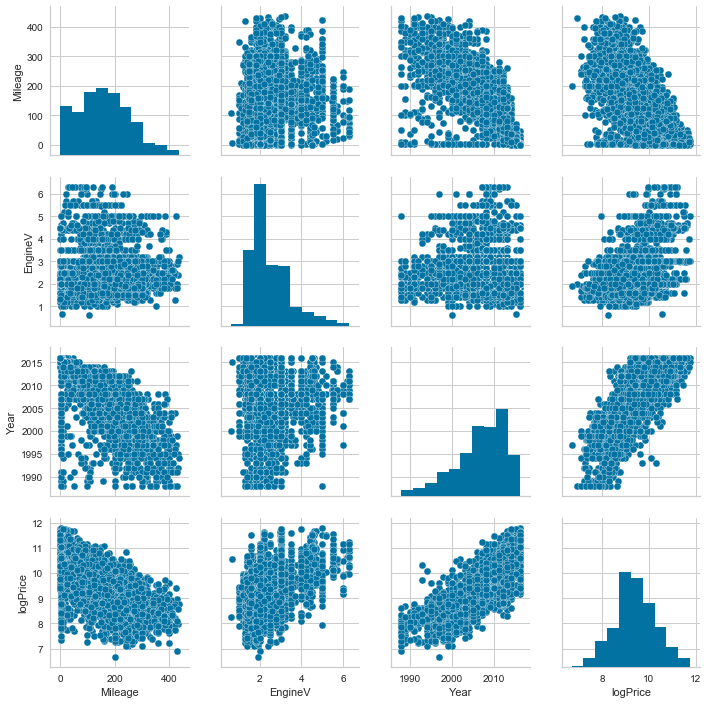

In [34]:
# Pairplots
sns.pairplot(cleanData)

In [35]:
cleanData.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


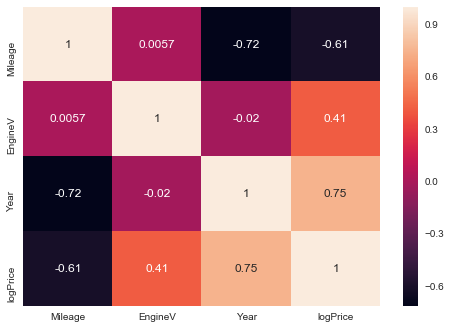

In [36]:
# Heatmap correlation coefficient
sns.heatmap(cleanData.corr(),annot = True)

In [37]:
"""
From the above plots,it shows that 2 of the independent variables (year and Mileage) are highly correlated. With a correlation of .72
This actually makes a lot of sense as mileage of a car increases with year..
Question now is, which variable will be dropped.

Lets use the Variance Inflation Factor(VIF) from statsmodel on EngineV, year and mileage
"""
testVIF = cleanData[['EngineV','Year','Mileage']]
Vif = pd.DataFrame()
Vif['VIF'] = [variance_inflation_factor(testVIF.values, i) for i in range(testVIF.shape[1])]
Vif['Features']= testVIF.columns

In [38]:
Vif

,VIF,Features
0,7.662068,EngineV
1,10.354854,Year
2,3.791584,Mileage


In [39]:
"""
The table above shows the VIF of Year and EngineV is high but year is higher.. Invariably,dropping the yearcolumn should lower the Vif of EngineV
"""
cleanData = cleanData.drop('Year', axis = 1)

In [40]:
cleanData.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656


In [41]:
# Lets see if the VIF has reduced
testVIF2 = cleanData[['EngineV','Mileage']]
Vif2 = pd.DataFrame()
Vif2['VIF'] = [variance_inflation_factor(testVIF2.values, i) for i in range(testVIF2.shape[1])]
Vif2['Features']= testVIF2.columns

In [42]:
Vif2

,VIF,Features
0,2.805214,EngineV
1,2.805214,Mileage


In [43]:
cols = ['logPrice','Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Model']
cleanData = cleanData[cols]

In [44]:
"""
Next,we sort the dummy variables using pandas get_dummy function.
Variables to sort:
Brand, Body, Engine Type
"""
dummyData = pd.get_dummies(cleanData, drop_first = True)

In [45]:
dummyData

,logPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.560997,200,2.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.287209,193,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7.244228,212,1.80,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9.388487,177,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.824046,260,1.79,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dums = dummyData.copy()
dumtest = dums.drop('logPrice', axis = 1)

In [47]:
firstvif = pd.DataFrame()
firstvif['vif']= [variance_inflation_factor(dumtest.values,i) for i in range(dumtest.shape[1])]
firstvif['variable'] = dumtest.columns

C:\Users\dare\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [48]:
"""
Next, we transform or standardize the input variables
"""
dummyData.head()

,logPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_var = dummyData.logPrice
x_var = dummyData.drop('logPrice', axis = 1)

In [50]:
# Normalise the x_var
scaler = StandardScaler()
scaler.fit(x_var)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
x_transform = scaler.transform(x_var)

In [52]:
x_transform

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147]])

In [111]:
y_var

0       8.34
1       8.97
2       9.50
3      10.04
4       9.81
5       9.56
6       9.29
7       7.24
8       9.39
9       7.82
10      9.16
11      9.26
12      9.68
13      9.06
14      8.00
15     10.18
16      8.16
17     10.55
18      8.92
19      8.82
20      9.26
21     10.12
22      9.94
23      8.78
24      9.52
25      9.05
26      7.97
27      9.98
28      9.79
29     10.26
30      9.19
31      9.58
32      8.70
33     11.12
34     10.43
35      9.19
36     11.05
37      8.95
38      9.17
39      9.46
40     10.62
41      8.22
42     10.29
43      8.78
44      9.02
45      9.88
46      9.51
47      9.13
48      8.52
49     10.08
50     10.52
51      9.09
52      8.96
53      7.41
54     10.82
55      9.18
56      9.21
57     11.16
58      8.78
59      8.37
60      8.01
61      9.07
62      9.10
63      9.92
64      9.10
65      9.50
66      8.22
67      9.20
68      8.22
69      9.66
70     10.11
71      8.92
72      9.39
73      9.53
74      9.01
75      8.85
76      8.82

In [53]:
"""
Now its time to run our regression analysis. First we split the dataset into train and test
"""
x_train,x_test,y_train, y_test = train_test_split(x_transform,y_var, test_size = 0.2)

In [54]:
# Fit the regression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
"""
Now,i want to check evaluate my regressor by comparing the predicted value with the actual value
"""

'\nNow,i want to check evaluate my regressor by comparing the predicted value with the actual value\n'

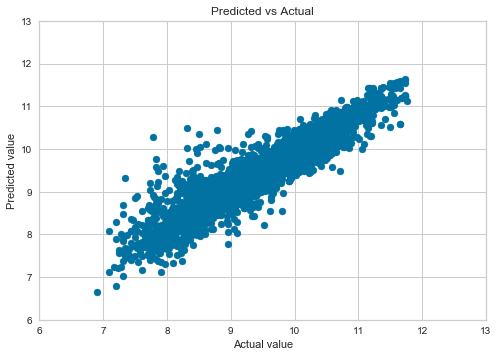

In [85]:
yhat = regression.predict(x_train)

# The predicted values are stored in the variable yhat.
# Plot a scatter plot to compare the predicted and actual value
plt.scatter(y_train, yhat)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted vs Actual')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [59]:
"""
The model seems fine but seem a little off for lower value and seems better for higher value.
Lets plot the Probability Distribution Plot of the residuals
"""

'\nThe model seems fine but seem a little off for lower value and seems better for higher value.\nLets plot the Probability Distribution Plot of the residuals\n'

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


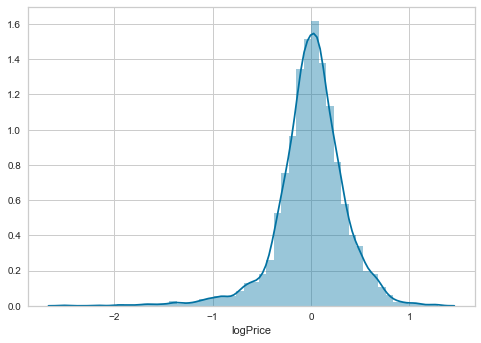

In [61]:
sns.distplot(y_train - yhat)

In [88]:
"""
The distribution above shows that our prediction is mostly higher than the actual value.
"""

'\nThe distribution above shows that our prediction is mostly higher than the actual value.\n'

In [89]:
# Lets take a look at the adjusted R squared value
rs = regression.score(x_train,y_train)
def Rsquared(x,y,rsquared):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r = 1 - (1-rsquared)*(n-1)/(n-p-1)
    return adjusted_r

In [92]:
adjusted_r = Rsquared(x_train,y_train,rs)
print(rs,adjusted_r)

0.8467143612343161 0.8298171651477577


In [93]:
"""
The model has a r-score of .84 and an adjusted r-square of .82. Which means the model explains 82% of the dataset   
"""
# lets check the weight and bias

'\nThe model has a r-score of .84 and an adjusted r-square of .82. Which means the model explains 82% of the dataset   \n'

In [96]:
regression.intercept_

-332659771554.3011

In [100]:
bias = pd.DataFrame()
bias['variables'] = x_var.columns
bias['weight'] = regression.coef_

In [101]:
bias

,variables,weight
0,Mileage,-3.518733e-01
1,EngineV,1.681079e-02
2,Brand_BMW,-1.013320e+12
3,Brand_Mercedes-Benz,-1.091878e+12
4,Brand_Mitsubishi,5.549151e+11
5,Brand_Renault,2.926921e+12
6,Brand_Toyota,-1.449715e+12
7,Brand_Volkswagen,3.658397e+12
8,Body_hatch,-6.118368e-02
9,Body_other,-3.173828e-03


In [102]:
"""
Lets evaluate the model"""
yTestHat = regression.predict(x_test) 

In [110]:
y_test

1794   10.01
230     9.94
3190    8.29
1737    8.92
1908    9.38
1051    7.94
1694   10.03
2799    8.84
187    10.37
2389    8.32
2202    8.99
2874    8.88
2570    9.16
1836    9.60
1323   10.33
2887    9.99
3001   10.09
39      9.46
2966    9.10
174     9.80
1698    9.30
1381    9.67
1976   10.16
2044    8.78
1819    9.35
3584    8.12
298     9.55
1805    8.46
470     8.37
3663   10.93
2712    8.33
2532   11.10
890     9.23
3646    7.44
932    10.33
904     8.07
699     8.99
606     9.93
1722   10.20
673     8.52
3554    9.55
806     8.82
980     9.23
132     9.80
3232    8.10
887     9.53
981     8.61
3815    9.81
1709    8.66
3276   11.20
882     9.19
1946    8.61
3164    8.48
3322    9.46
545    10.18
2879    7.82
2188    9.39
857     9.62
1599    9.61
3460    9.55
358     8.51
1014    8.95
1006    8.82
841     9.79
3657    9.46
2604   10.33
2269   10.06
3005    9.58
2924    9.30
1756    8.85
3758    9.26
3829    8.49
2784    9.58
1422   11.59
1823    9.38
1632    9.85
1781    8.52

In [119]:
testing = pd.DataFrame()
testing['Target'] = np.exp(y_test)


In [120]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
testing

,Target
0,22200.00
1,20800.00
2,4000.00
3,7450.00
4,11900.00
5,2800.00
6,22700.00
7,6900.00
8,32000.00
9,4100.00


In [121]:
testing['prediction'] = np.exp(yTestHat)

C:\Users\dare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [123]:
testing['residual'] = testing['Target']- testing['prediction']

In [124]:
testing['% error'] = np.absolute(testing['residual']/testing['Target']*100)

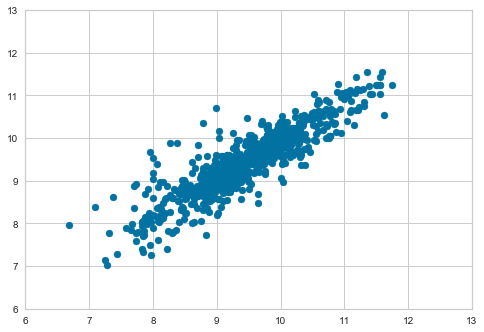

In [112]:
plt.scatter(y_test, yTestHat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [126]:
testing.sort_values(by = '% error')

,Target,prediction,residual,% error
653,35500.00,35519.75,-19.75,0.06
594,12450.00,12457.96,-7.96,0.06
712,11500.00,11490.83,9.17,0.08
221,5600.00,5611.13,-11.13,0.20
214,9600.00,9619.71,-19.71,0.21
690,12350.00,12388.20,-38.20,0.31
770,3500.00,3512.64,-12.64,0.36
136,34500.00,34370.24,129.76,0.38
259,8950.00,8984.09,-34.09,0.38
525,3200.00,3187.77,12.23,0.38
